## Standardization 

### Also called as Z-score Normalization.

#### -  Data standardization is the process of converting data to a common format to enable users to process and analyze it. 

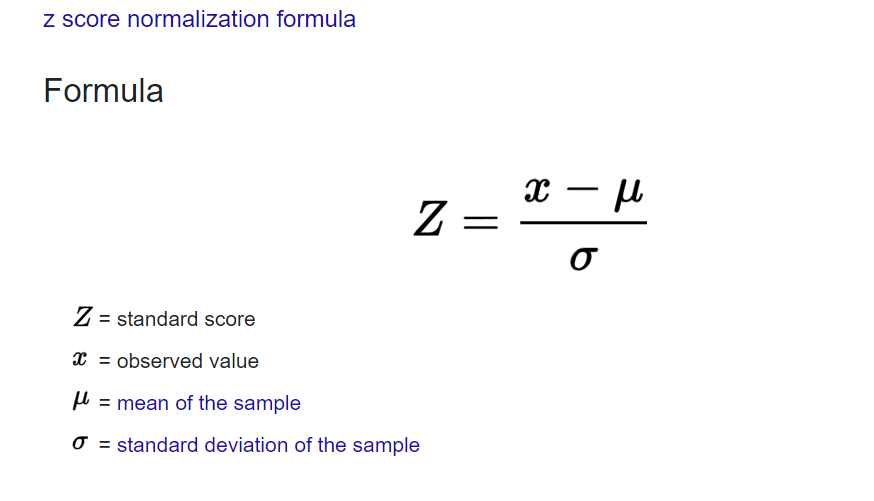

##### Above formula is used to convert every data point (x) to standardized value known as z-score.

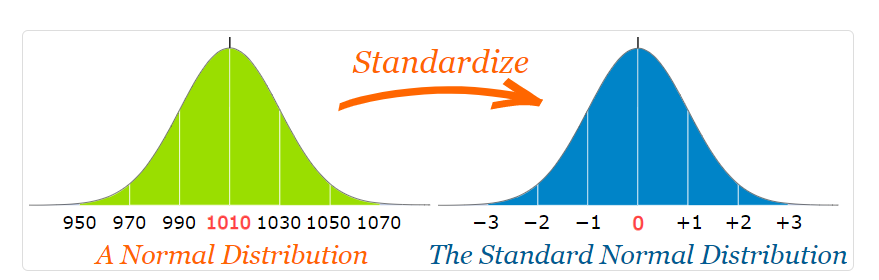

### Key Points to Remember
1. The SND (i.e. z-distribution) is always the same shape as the raw score distribution. For example, if the distribution of raw scores if normally distributed, so is the distribution of z-scores.
2. The mean of any SND always = 0.
3. The standard deviation of any SND always = 1. Therefore, one standard deviation of the raw score (whatever raw value this is) converts into 1 z-score unit.

#### Let's do practicle implementation

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the csv file
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [145]:
# Dividing the data in X,y
X = df.drop('Purchased',axis = 1)
y = df['Purchased']

In [146]:
# split the data into train test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)
X_train.shape,X_test.shape

((282, 2), (121, 2))

In [9]:
X_train.head()

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000


In [10]:
X_test.head()

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000


In [11]:
# using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

StandardScaler()

In [17]:
print(scaler.mean_)
print(scaler.var_)
print(scaler.with_std)
print(scaler.n_features_in_)

[3.78642857e+01 6.98071429e+04]
[1.04038724e+02 1.19572709e+09]
True
2


In [18]:
# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [19]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [20]:
X_train_scaled.ndim

2

In [21]:
X_test_scaled.ndim

2

In [22]:
X_train_scaled = pd.DataFrame(data = X_train_scaled, columns=X_train.columns)
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [29]:
X_test_scaled = pd.DataFrame(data = X_test_scaled,columns = X_test.columns)
X_test_scaled

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


In [30]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [31]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


### Effect of Scaling

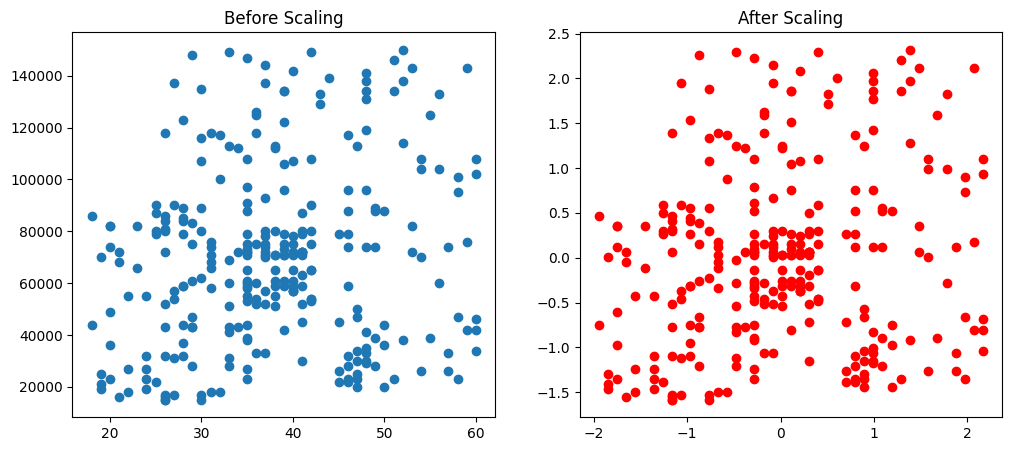

In [32]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color = 'red')
ax2.set_title("After Scaling")
plt.show()

##### Vizualization showing us that plotting remains same just the scale is changed in X and y axis.

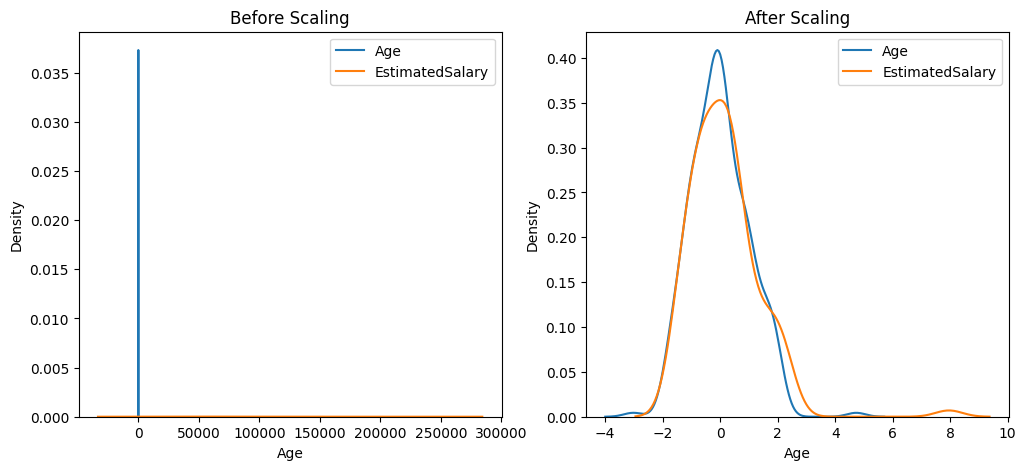

In [150]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1,label = "Age")
sns.kdeplot(X_train['EstimatedSalary'], ax = ax1, label = "EstimatedSalary")
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'],ax = ax2, label = "Age")
sns.kdeplot(X_test_scaled['EstimatedSalary'],ax = ax2,label = "EstimatedSalary")
ax2.legend()
plt.show()

##### We plotted the probability density function, notice that before scaling we cannot compare the distribution between age and estimatedsalary. But After the scaling we can now clearly see the distributions of the two and compare.

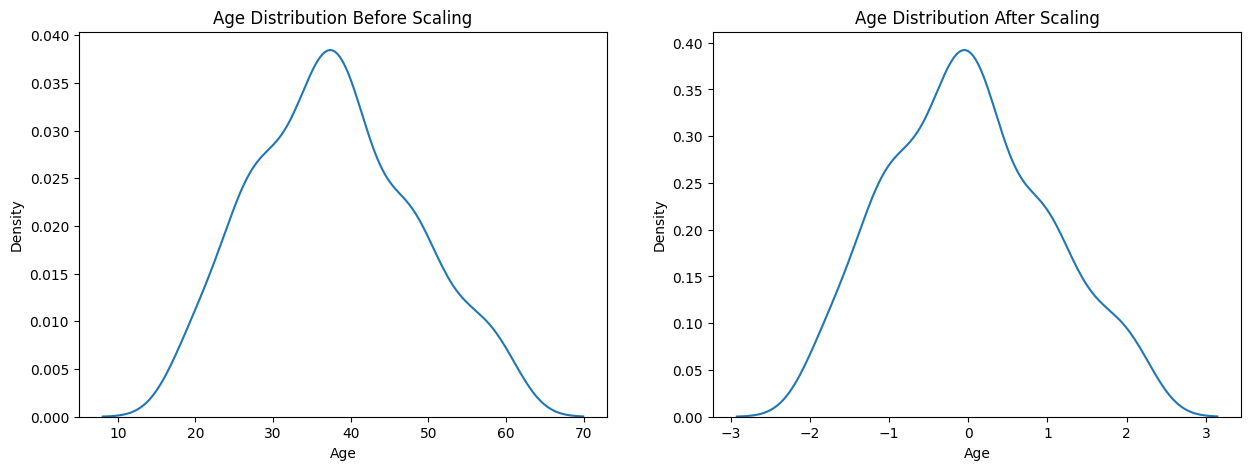

In [86]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax[0].set_title("Age Distribution Before Scaling")
sns.kdeplot(data=X_train, x=X_train['Age'], ax=ax[0])

ax[1].set_title("Age Distribution After Scaling")
sns.kdeplot(data=X_train_scaled,x=X_train_scaled['Age'],ax=ax [1])
plt.show()

### Why scaling is important?

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [91]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [98]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [99]:
from sklearn.metrics import accuracy_score

In [105]:
print("Accuracy on Normal data:",round(accuracy_score(y_test,y_pred)*100,2),'%')
print("Accuracy on Scaled data:",round(accuracy_score(y_test,y_pred_scaled)*100,2),'%')

Accuracy on Normal data: 65.83 %
Accuracy on Scaled data: 86.67 %


##### Clearly after applying Standardization accuracy improves significantly in Logistic Regression.

In [106]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [108]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [109]:
y_pred= dt.predict(X_test)
y_pred_scaled= dt_scaled.predict(X_test_scaled)

In [110]:
print("Accuracy on Normal Data:",round(accuracy_score(y_test,y_pred)*100,2),"%")
print("Accuracy on Scaled Data:",round(accuracy_score(y_test,y_pred_scaled)*100,2),'%')

Accuracy on Normal Data: 87.5 %
Accuracy on Scaled Data: 86.67 %


##### Clearly on Decision tree no effect of scalling is there.

### Effect of Outlier

In [112]:
np.round(df.describe(),2)

,Age,EstimatedSalary,Purchased
count,400.00,400.00,400.00
mean,37.66,69742.50,0.36
std,10.48,34096.96,0.48
min,18.00,15000.00,0.00
25%,29.75,43000.00,0.00
50%,37.00,70000.00,0.00
75%,46.00,88000.00,1.00
max,60.00,150000.00,1.00


In [113]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [115]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}))

C:\Windows\Temp\ipykernel_25756\3119625208.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}))


In [116]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
0,5,1000,0
1,90,250000,1


In [127]:
X = df.drop("Purchased",axis=1)
y = df["Purchased"]

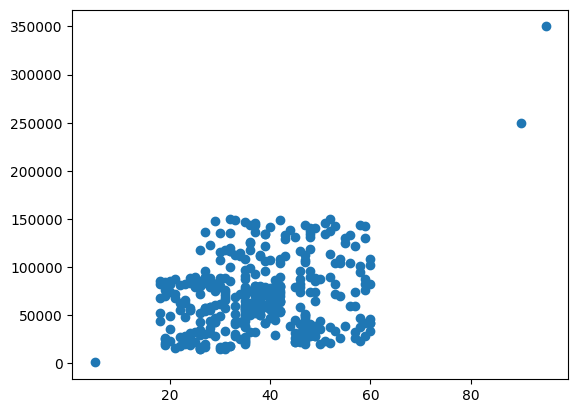

In [130]:
plt.scatter(X["Age"],X["EstimatedSalary"])
plt.show()

In [128]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [137]:
X_train_scaled = pd.DataFrame(data = X_train_scaled,columns=X_train.columns)
X_train_scaled
X_test_scaled = pd.DataFrame(data = X_test_scaled,columns=X_test.columns)
X_test_scaled

,Age,EstimatedSalary
0,-0.287399,-1.335552
1,0.351481,0.166077
2,-0.561205,1.356048
3,-0.926279,0.506069
4,-1.291353,-0.315577
...,...,...
116,-0.287399,-1.250554
117,-0.378667,-1.250554
118,-0.287399,-0.542238
119,-0.104862,-0.343910


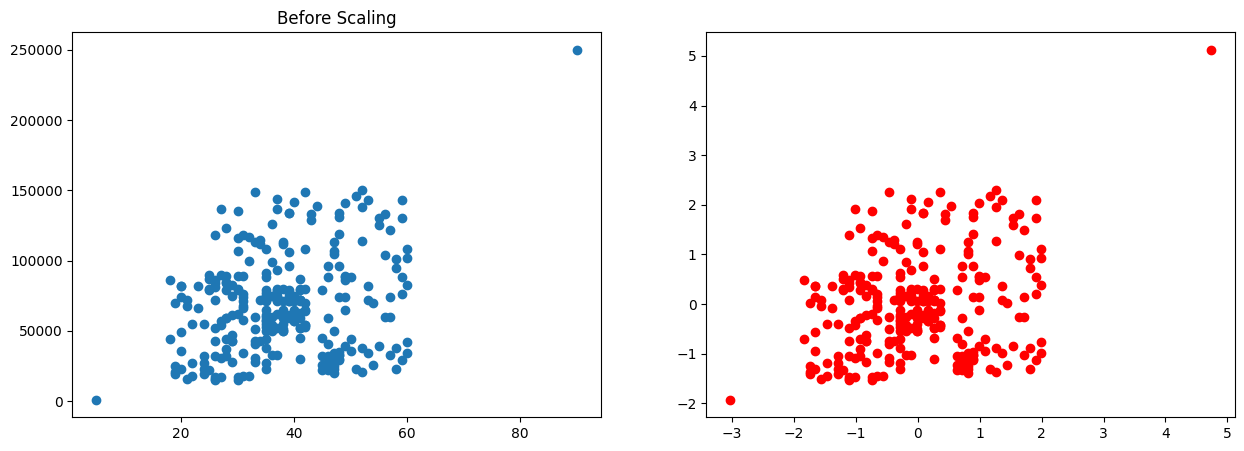

In [144]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize = (15,5))
ax[0].scatter(X_train["Age"],X_train["EstimatedSalary"])
ax[0].set_title("Before Scaling")

ax[1].scatter(X_train_scaled["Age"],X_train_scaled["EstimatedSalary"],color = 'red')
plt.show()


In [ ]:
# Outlier remains after applying Standardization.

### When to use Standardization?

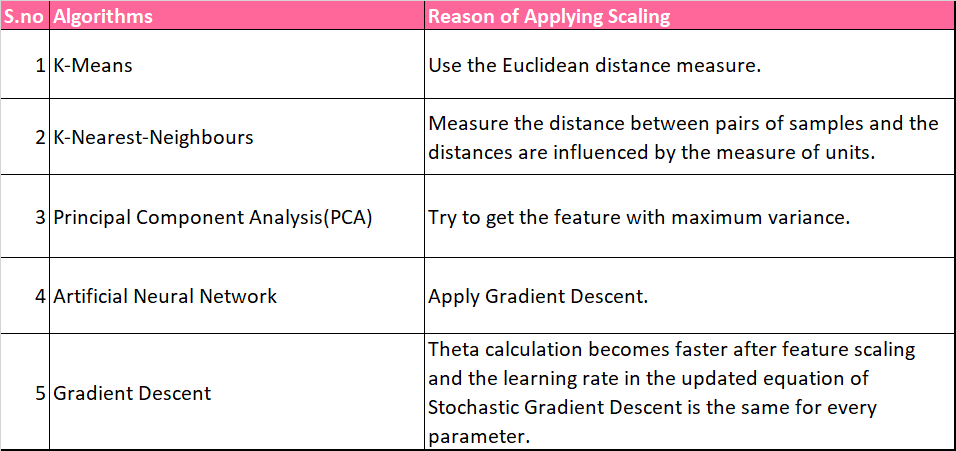